In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/chand/Downloads/100-days-of-machine-learning-main/100-days-of-machine-learning-main/day42-outlier-removal-using-zscore/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
337,6.95,68.0,0
516,6.83,28.0,0
681,6.78,10.0,1
530,6.28,18.0,1
181,7.30,42.0,0


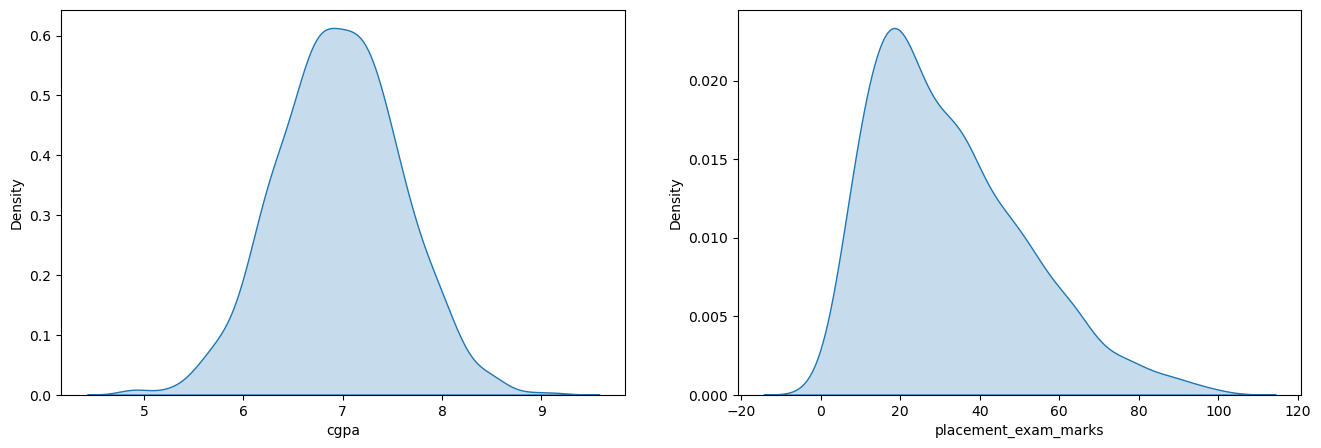

In [3]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'], fill = True)

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'], fill = True)

plt.show()

In [4]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

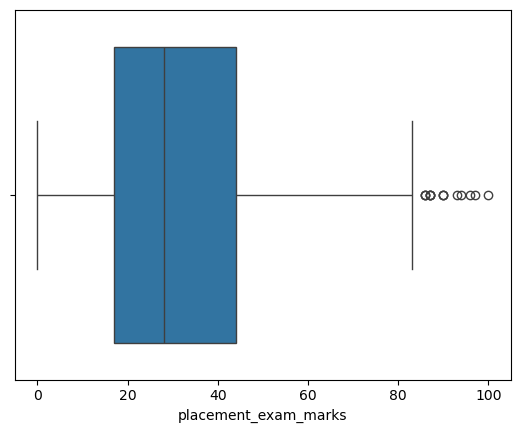

In [8]:
sns.boxplot(x = df['placement_exam_marks'])

In [11]:
#Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [12]:
percentile75

np.float64(44.0)

In [14]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [17]:
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)

In [18]:
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  84.5
Lower limit:  -23.5


In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [21]:
new_df = df[df['placement_exam_marks'] <= upper_limit]

In [22]:
new_df.shape

(985, 3)

In [23]:
#comparing

<Axes: xlabel='placement_exam_marks'>

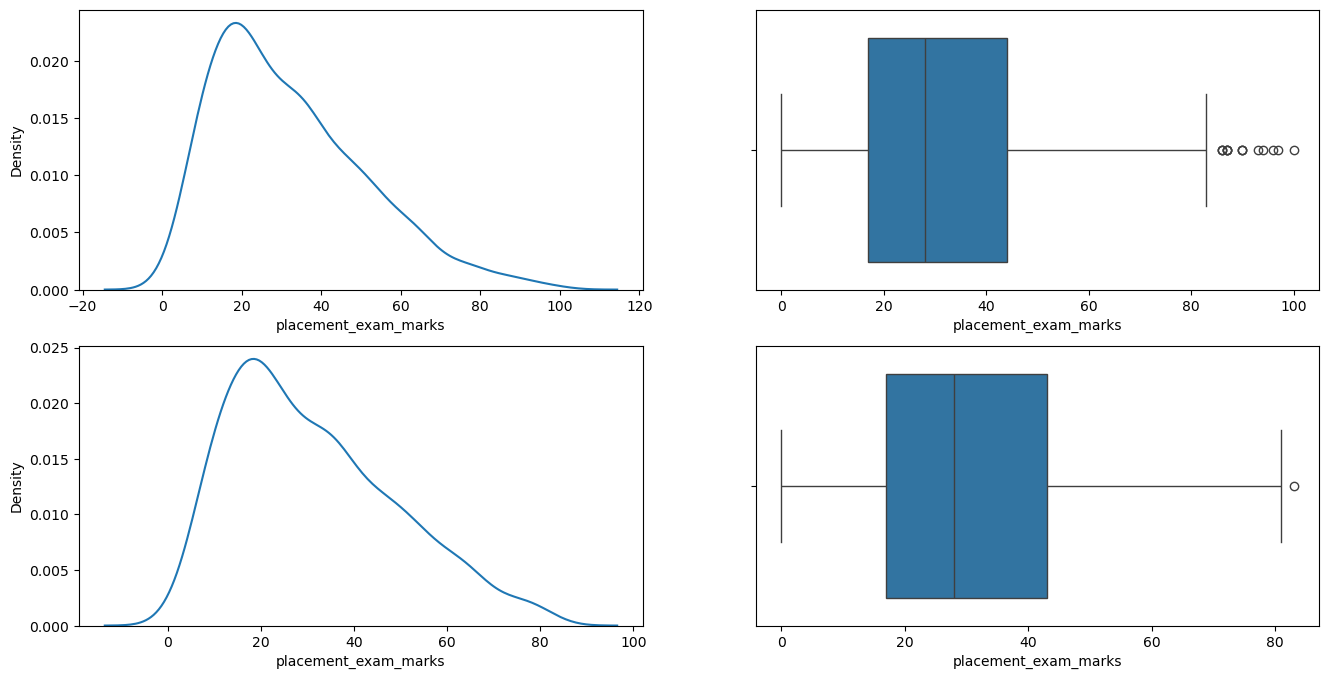

In [25]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])

# Capping

In [26]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [27]:
new_df_cap.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

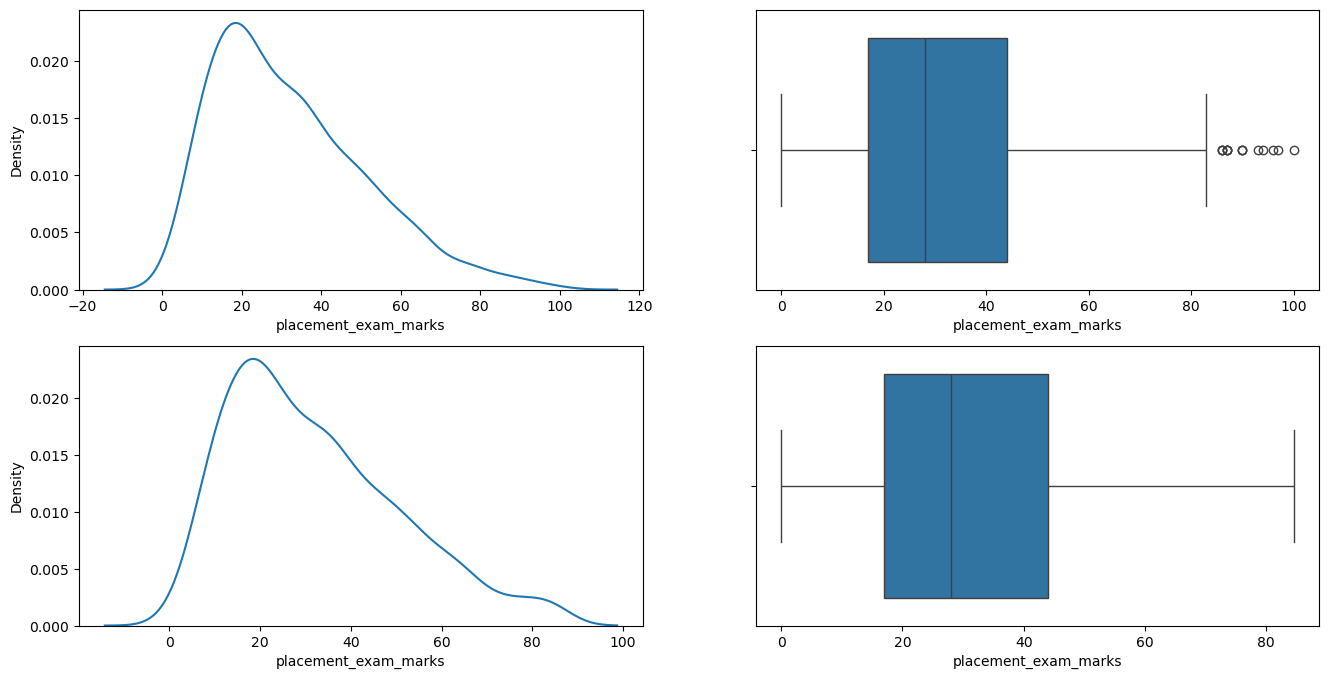

In [28]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.kdeplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])